<a href="https://colab.research.google.com/github/NguyenNgocPhuongTrinh2912/PortfolioProjects/blob/main/Bank_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introduction**

Customer churn is defined as customers that stopped using a company's product or service during a certain time frame. Customer churn is one of the most important metrics for a growing business to evaluate. While it's not the happiest measure, it's a number that can give a company the hard truth about its customer retention.

Hence, with the dataset named Bank Cusomer Churn from Kaggle, I am going to:


*   Explore and visualize the factors that have impact on customer churn
*   Select a machine learning model to predict customer churn so that bank can put its effort to prevent churn  








# **2. Dataset Understanding and Preparation**



In [ ]:
#import libraries
import pandas as pd
from sklearn.impute import SimpleImputer
import missingno as msno
import numpy as np
import seaborn as sns
import io

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import file
from google.colab import files
uploaded = files.upload()

Saving Customer-Churn-Records.csv to Customer-Churn-Records.csv


In [ ]:
#read file
df = pd.read_csv(io.BytesIO(uploaded['Customer-Churn-Records.csv']))

In [ ]:
# show the first 10 rows
df.head(10)

In [ ]:
df.shape

(10000, 18)

This dataset has 10000 rows and 18 columns

In [ ]:
df.columns.values

array(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'], dtype=object)

This dataset includes some information about:

*   Customers who left the bank - Exited.
*   Customer account information- CustomerId, Surname, CreditScore, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, Complain, Satisfaction Score, Card Type, Point Earned.

*   Demographic information - Geography, Gender, Age, EstimatedSalary







In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [ ]:
#drop any duplicates
df.drop_duplicates()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [ ]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

There is no missing value in the dataset

In [ ]:
df =df.drop(['RowNumber', 'CustomerId', 'Surname'],axis = 1)

CustomerId is nearly unique information of each customer. Moreover, Rownumber and Surname are not really relevant to customer churn. Therefore, I will drop these 3 columns.

# **3. Exploration Data Analysis**

In [ ]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.05)
fig1, ax1 = plt.subplots(figsize=(6, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90, colors =["lightblue","pink"])
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

The above pie chart illustrates that a majority of bank customers selected to retain while around 20% of bank customers churned.

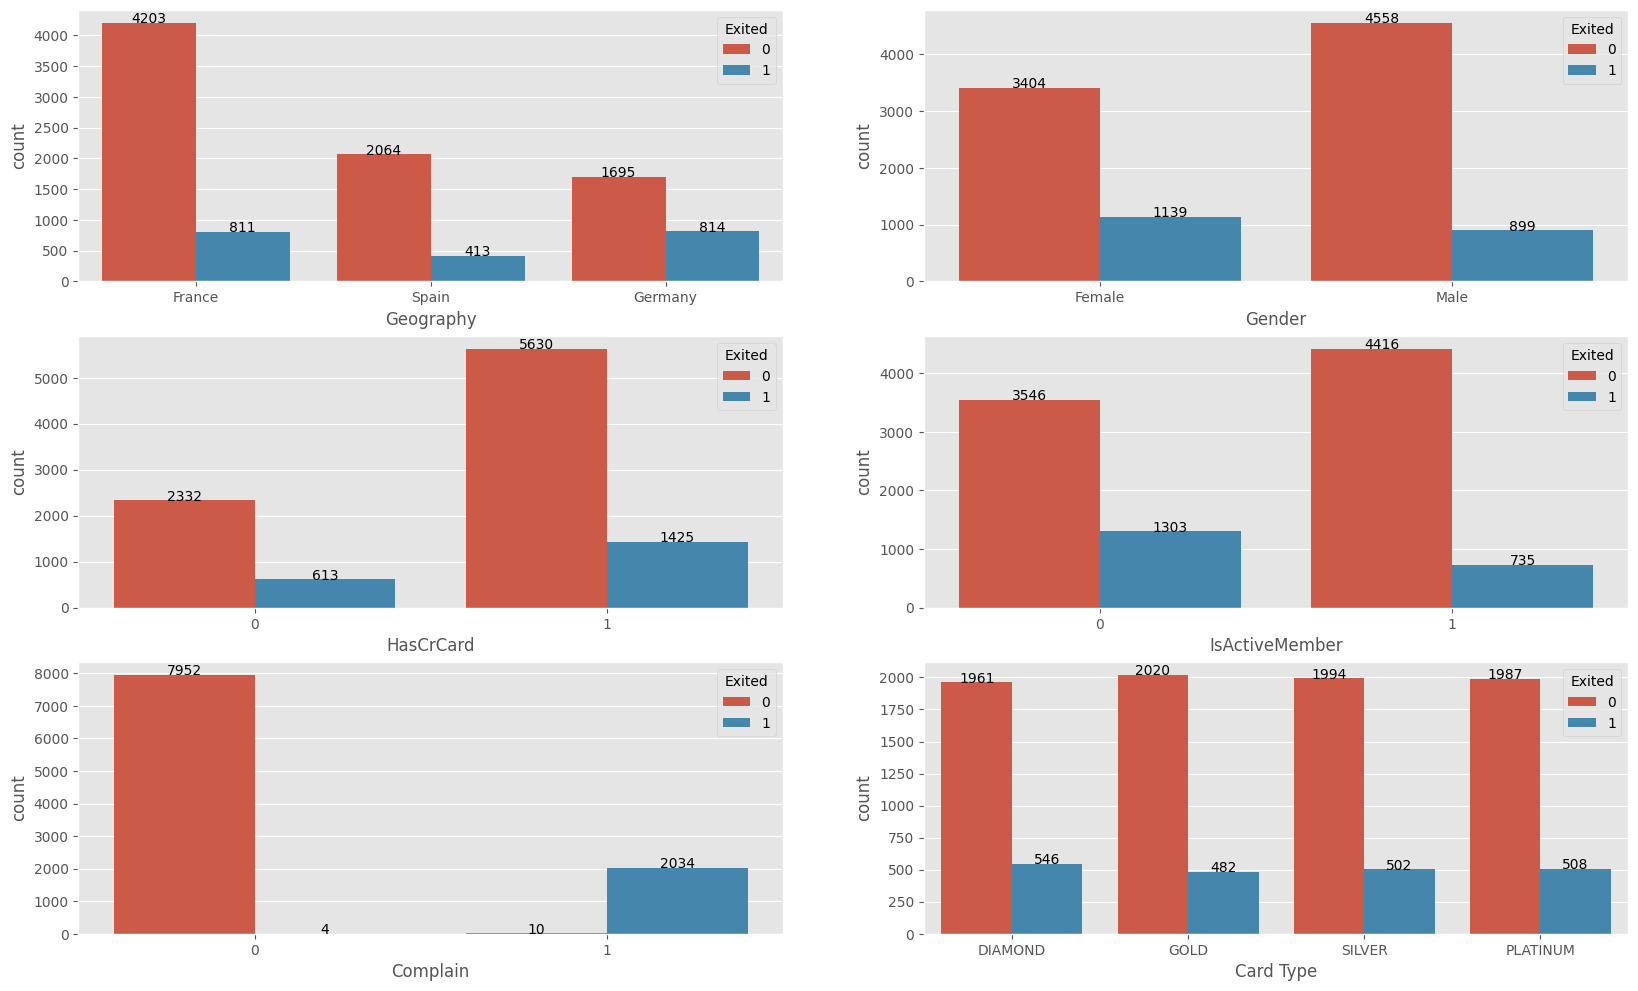

In [ ]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])
sns.countplot(x='Complain', hue = 'Exited',data = df, ax=axarr[2][0])
sns.countplot(x='Card Type', hue = 'Exited',data = df, ax=axarr[2][1])
# Add lables for each column in the charts
for ax in axarr.flat:
    for p in ax.patches:
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.text(x, y, f'{y:.0f}', ha='center')

A glance at these charts reveals that:


*   A majority of customers in this dataset were French. Churned customers from all 3 countries were lower than who retained their accounts.
*   The large number of retained customers was male. On the other hand, the number of female customers churning was higher than male.

*   A considerable  number of churned customers was those who had credit cards.
*   Unsurprisingly, the proportion of customers churning was those who complained and were inactive members.
*   There is no significant difference in the quantity of card type of retained clients.






<Axes: xlabel='Exited', ylabel='Point Earned'>

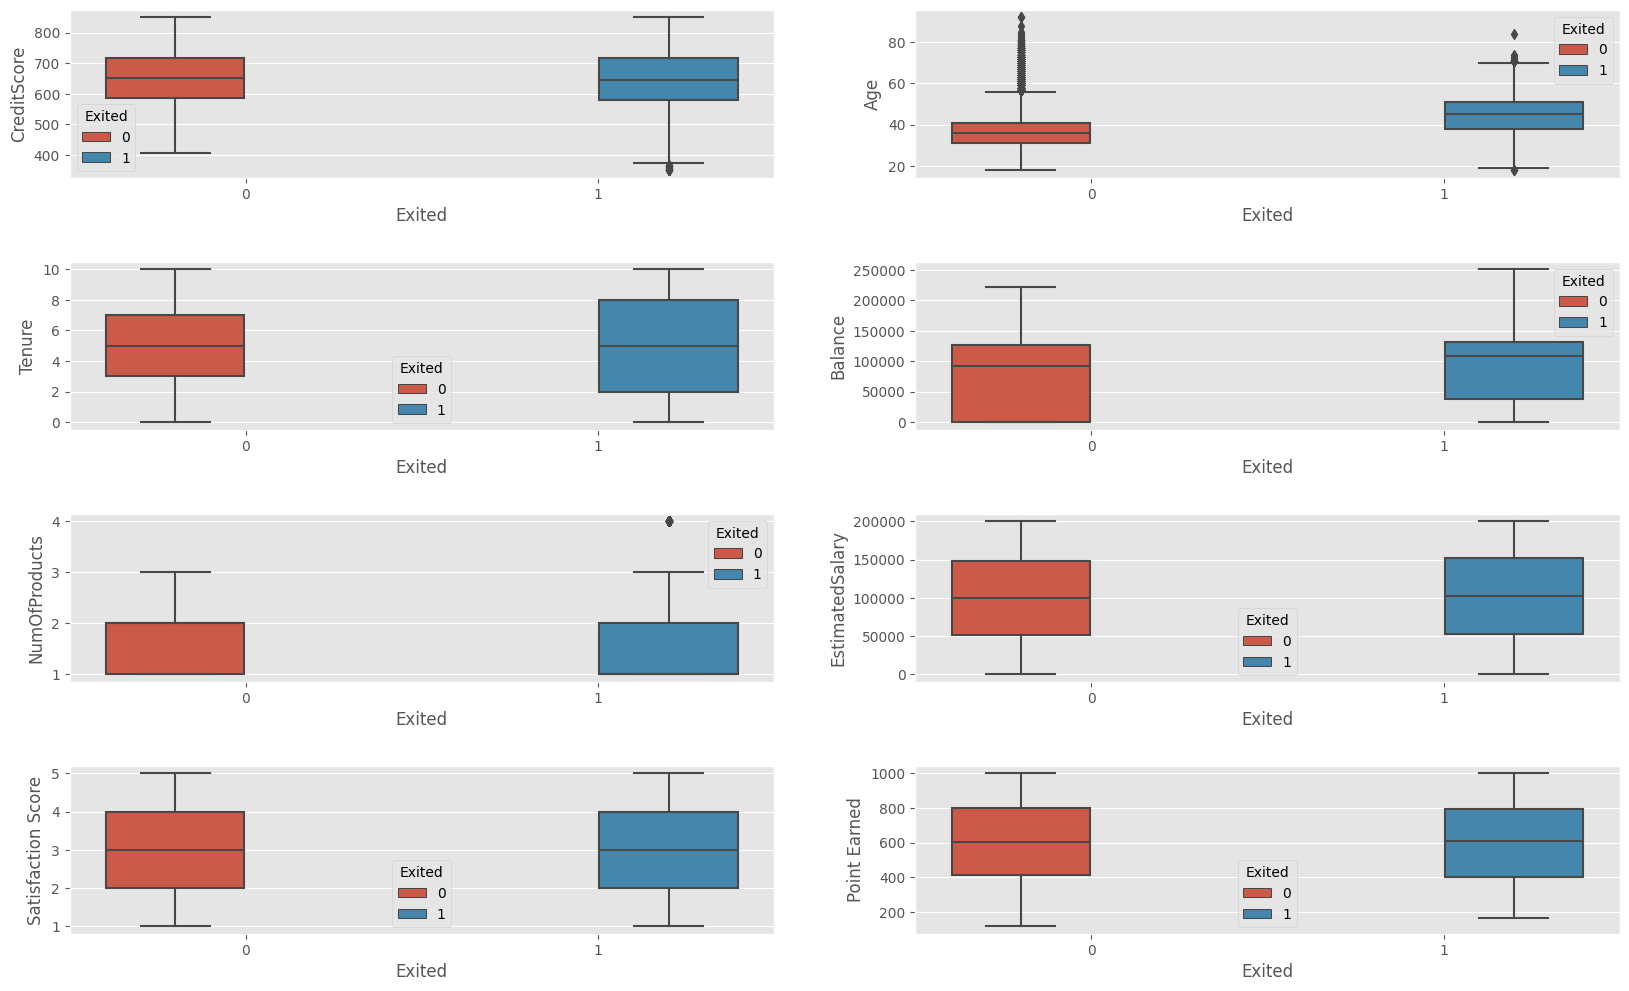

In [ ]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(4, 2, figsize=(20, 12))
fig.subplots_adjust(hspace=0.5)
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])
sns.boxplot(y='Satisfaction Score',x = 'Exited', hue = 'Exited',data = df, ax=axarr[3][0])
sns.boxplot(y='Point Earned',x = 'Exited', hue = 'Exited',data = df, ax=axarr[3][1])

These charts show some information:
*   The distributions of CreditScore and PointEarned do not have big differences between retained and churned customers.
*   The old tended to leave the bank more than the younger ones.

*   Churned customers were either those who spent a little time or a lot of time with the bank, while retained clients tended to have an average tenure.
*   Churned clients were those who had considerable balances in their bank accounts.

*   Number of Products, Estimated Salary, Satisfaction Score did not have a great effect on likelihood to churn.






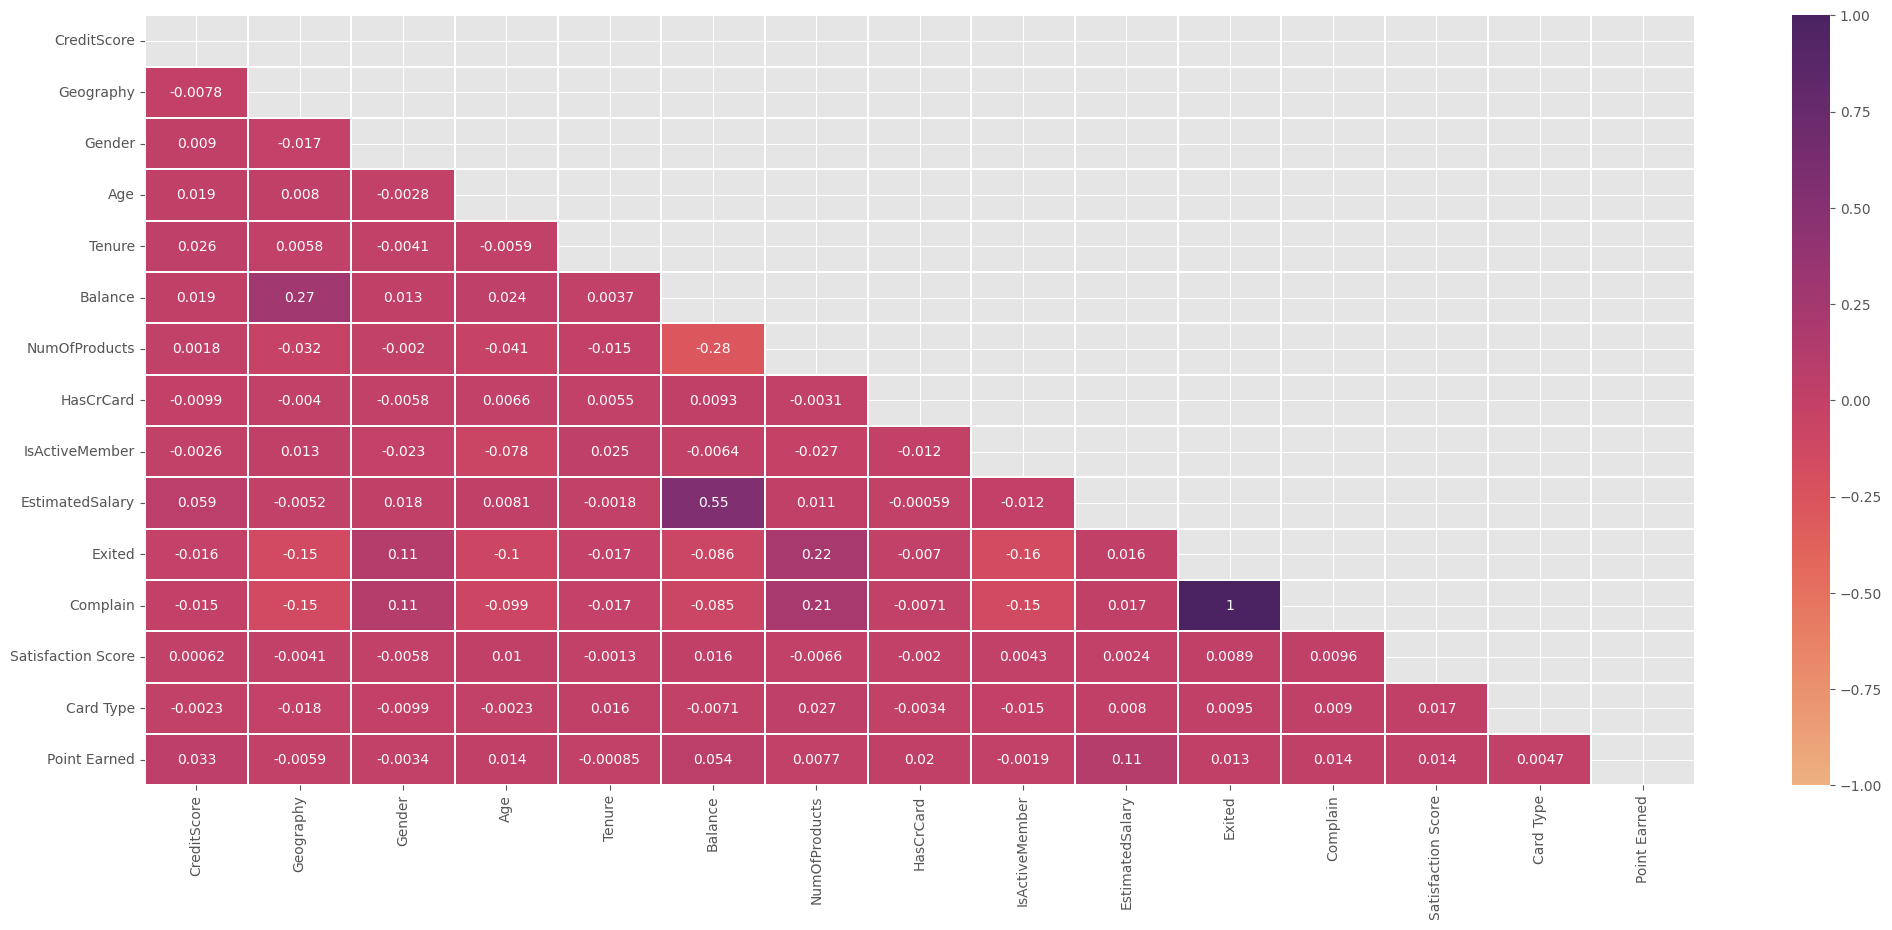

In [ ]:
#Correlation using heatmap
plt.figure(figsize=(25,10))
corr=df.apply(lambda x:pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr,dtype=bool))
ax =sns.heatmap(corr, mask=mask, xticklabels = corr.columns, yticklabels = corr.columns, annot=True, linewidths =.2,cmap ="flare",vmin=-1, vmax=1)

It seems like Complain attribute has a significant impact on Exited with 1 point in the heatmap

# **4. Data Preprocessing**

In [ ]:
#Create a function to encode the categorial variables
def object_to_label_encoder(dataframe_series):
    if dataframe_series.dtype == "object":
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [ ]:
#Apply the function to the dataset
df=df.apply(lambda x:object_to_label_encoder(x))
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,2,0,464
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,5,1,350
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425


In [ ]:
#Exited is target variable
y_data = df['Exited']
#Other attributes are independent variables
x_data=df.drop('Exited',axis=1)

In [ ]:
#Split the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.30, random_state=400)
#Show the number of training and test samples
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 3000
number of training samples: 7000


In [ ]:
#Correlation between independent variables and target variable
plt.figure(figsize=(14,7))
df.corr()["Exited"].sort_values(ascending = False)

Exited                1.000000
Complain              0.995693
Age                   0.285296
Balance               0.118577
Geography             0.035712
EstimatedSalary       0.012490
Point Earned         -0.004628
Satisfaction Score   -0.005849
HasCrCard            -0.006976
Card Type            -0.010861
Tenure               -0.013656
CreditScore          -0.026771
NumOfProducts        -0.047611
Gender               -0.106267
IsActiveMember       -0.156356
Name: Exited, dtype: float64

<Figure size 1400x700 with 0 Axes>

# **5. Selecting Machine Learning Model for Prediction**

In [ ]:
#Create a function to calculate auc score, false positive rate and true positive rate
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method);
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2);
    return (auc_score, fpr_df, tpr_df)

In [ ]:
#KNN
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(x_train,y_train)
auc_knn, fpr_knn, tpr_knn = get_auc_scores(y_train, knn_model.predict(x_train),knn_model.predict_proba(x_train)[:,1])
predicted_y = knn_model.predict(x_train)
print(classification_report(y_train, predicted_y))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89      5571
           1       0.59      0.06      0.10      1429

    accuracy                           0.80      7000
   macro avg       0.70      0.52      0.49      7000
weighted avg       0.76      0.80      0.73      7000



In [ ]:
#RandomForest
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(x_train, y_train)
auc_rf, fpr_rf, tpr_rf = get_auc_scores(y_train, model_rf.predict(x_train),model_rf.predict_proba(x_train)[:,1])
predicted_y = model_rf.predict(x_train)
print(classification_report(y_train, predicted_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5571
           1       1.00      1.00      1.00      1429

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



In [ ]:
#Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
auc_lr, fpr_lr, tpr_lr = get_auc_scores(y_train, lr_model.predict(x_train),lr_model.predict_proba(x_train)[:,1])
predicted_y = lr_model.predict(x_train)
print(classification_report(y_train, predicted_y))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      5571
           1       0.42      0.08      0.13      1429

    accuracy                           0.79      7000
   macro avg       0.61      0.52      0.50      7000
weighted avg       0.73      0.79      0.73      7000



In [ ]:
#Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
auc_dt, fpr_dt, tpr_dt = get_auc_scores(y_train, dt_model.predict(x_train),dt_model.predict_proba(x_train)[:,1])
predicted_y = dt_model.predict(x_train)
print(classification_report(y_train, predicted_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5571
           1       1.00      1.00      1.00      1429

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



From the above results, Random Forest model and Decision Tree model have the highest precision and recall returns. But I want to find the most suitable model for this dataset. So I will use AUC score to compare.

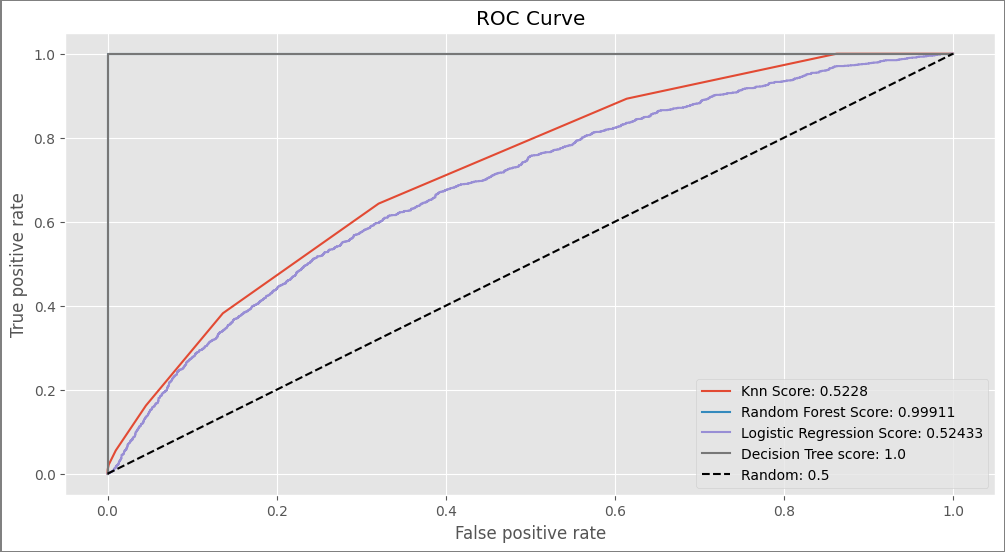

In [ ]:
#ROC Curve
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_knn, tpr_knn , label = 'Knn Score: ' + str(round(auc_knn, 5)))
plt.plot(fpr_rf, tpr_rf , label = 'Random Forest Score: ' + str(round(auc_rf, 5)))
plt.plot(fpr_lr, tpr_lr, label = 'Logistic Regression Score: ' + str(round(auc_lr, 5)))
plt.plot(fpr_dt, tpr_dt, label = 'Decision Tree score: ' + str(round(auc_dt, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

According to the ROC Curve, Decision Tree model has the highest AUC score (1.0). Therefore, I will use this model for my prediction.

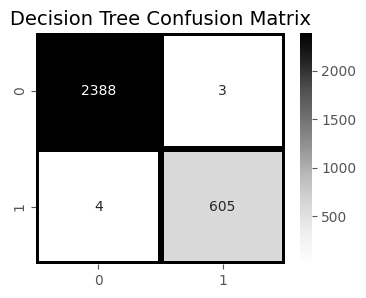

In [ ]:
#Decision Tree Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, dt_model.predict(x_test)), annot=True,fmt = "d",linecolor="k",linewidths=3, cmap="Greys")
plt.title("Decision Tree Confusion Matrix",fontsize=14)
plt.show()

From the confusion matrix, we can note that there are a total of 2391 actual non - churn values and the model predicts 2388 of them exactly. On the other hand, the model also correctly predicts 605 out of 609 actual churn values.

# **6. Conclusion**

Churn Customer Prediction plays an important role on a bank's profitability. Understanding the factors which are relevant to churned customers can help the bank prevent churning. With this dataset, the bank should review its target to improve the strategy for different age groups. In addition, the bank needs to promote some programs as well as strengthen its customer care services, thereby not only increasing the number of active members but also decreasing churned clients with high balances.




